In [ ]:
 from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/data.csv')
print(data.head())

   Unnamed: 0                       VFN                         Mp       Mh  \
0           6  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI  RENAULT   
1          17  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI  RENAULT   
2         224  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI  RENAULT   
3         501  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI  RENAULT   
4         504  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI  RENAULT   

                  Tan   T      Cn  Ct  Cr  m (kg)  ...  W (mm)  At1 (mm)  \
0  e2*2007/46*0457*23  AH  TWINGO  M1  M1   993.0  ...  2492.0    1455.0   
1  e2*2007/46*0457*23  AH  TWINGO  M1  M1  1015.0  ...  2492.0    1455.0   
2  e2*2007/46*0457*23  AH  TWINGO  M1  M1  1015.0  ...  2492.0    1455.0   
3  e2*2007/46*0457*24  AH  TWINGO  M1  M1  1015.0  ...  2492.0    1455.0   
4  e2*2007/46*0457*24  AH  TWINGO  M1  M1   993.0  ...  2492.0    1455.0   

       Ft Fm ec (cm3)  ep (KW)  z (Wh/km)     IT Fuel consumption   

In [ ]:
#Delete either Mp or Mh & VFN
data.drop(['Mh','VFN'], axis=1, inplace=True)

In [ ]:
#Identify the type of each variable
data.dtypes

,0
Unnamed: 0,int64
Mp,object
Tan,object
T,object
Cn,object
Ct,object
Cr,object
m (kg),float64
Ewltp (g/km),float64
W (mm),float64


In [ ]:
#identify the duplicated rows based on all columns
dups = data.duplicated()

#count the number of duplicated rows
dup_count = dups.sum()

print("Number of duplicated rows: ", dup_count)

Number of duplicated rows:  0


In [ ]:
from sklearn.impute import KNNImputer
#Identify columns with non-numerical data
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

#Handle non-numeric columns (example: drop them)
data_numeric = data.drop(non_numeric_cols, axis=1)

#Apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_num_imp = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)
data_num_imp.drop(columns=data_num_imp.columns[0], axis=1, inplace=True)

data_num_imp.head()

,m (kg),Ewltp (g/km),W (mm),At1 (mm),ec (cm3),ep (KW),z (Wh/km),Fuel consumption,Electric range (km)
0,993.0,117.0,2492.0,1455.0,999.0,48.0,274.0,5.2,45.0
1,1015.0,118.0,2492.0,1455.0,999.0,48.0,274.0,5.2,45.0
2,1015.0,119.0,2492.0,1455.0,999.0,48.0,274.0,5.3,45.0
3,1015.0,118.0,2492.0,1455.0,999.0,48.0,274.0,5.2,45.0
4,993.0,117.0,2492.0,1455.0,999.0,48.0,274.0,5.2,45.0


In [ ]:
#Apply OHE on categorical variables with class <= 10
ohe_cat_variables = data[['Mp','Ct','Cr','Ft','Fm']]
ohe_cat_dummies = pd.get_dummies(ohe_cat_variables, drop_first = True, dtype=int)
ohe_cat_dummies.head()

,Mp_FORD,Mp_HYUNDAI MOTOR EUROPE,Mp_KIA,Mp_MAZDA-SUBARU-SUZUKI-TOYOTA,Mp_MERCEDES-BENZ,Mp_RENAULT-NISSAN-MITSUBISHI,Mp_STELLANTIS,Mp_TESLA-HONDA-JLR,Mp_VOLKSWAGEN,Ct_M1G,...,Ft_diesel/electric,Ft_e85,Ft_lpg,Ft_ng,Ft_petrol,Ft_petrol/electric,Fm_F,Fm_H,Fm_M,Fm_P
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#Apply KNN Imputer
ohe_cat_dummies_imp = pd.DataFrame(imputer.fit_transform(ohe_cat_dummies), columns=ohe_cat_dummies.columns)
ohe_cat_dummies_imp.head()

,Mp_FORD,Mp_HYUNDAI MOTOR EUROPE,Mp_KIA,Mp_MAZDA-SUBARU-SUZUKI-TOYOTA,Mp_MERCEDES-BENZ,Mp_RENAULT-NISSAN-MITSUBISHI,Mp_STELLANTIS,Mp_TESLA-HONDA-JLR,Mp_VOLKSWAGEN,Ct_M1G,...,Ft_diesel/electric,Ft_e85,Ft_lpg,Ft_ng,Ft_petrol,Ft_petrol/electric,Fm_F,Fm_H,Fm_M,Fm_P
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Apply Label Encoder to the remaining Categorical Variables
from sklearn import preprocessing
le_cat_variables = data[['Tan', 'T', 'Cn', 'IT']]
le = preprocessing.LabelEncoder()
le_cat_variables = le_cat_variables.apply(le.fit_transform)
le_cat_variables.head()

,Tan,T,Cn,IT
0,1165,227,1526,83
1,1165,227,1526,83
2,1165,227,1526,83
3,1166,227,1526,83
4,1166,227,1526,83


In [ ]:
#Apply KNN Imputer on le_cat_vriables
le_cat_variables_imp = pd.DataFrame(imputer.fit_transform(le_cat_variables), columns=le_cat_variables.columns)
le_cat_variables_imp.head()

,Tan,T,Cn,IT
0,1165.0,227.0,1526.0,83.0
1,1165.0,227.0,1526.0,83.0
2,1165.0,227.0,1526.0,83.0
3,1166.0,227.0,1526.0,83.0
4,1166.0,227.0,1526.0,83.0


In [ ]:
#data consolidation
import pandas as pd
df = pd.concat([data_num_imp, ohe_cat_dummies_imp, le_cat_variables_imp], axis=1)
df.head()
print('Shape', df.shape)
print('Missing Values', df.isnull().sum())

Shape (145053, 36)
Missing Values m (kg)                           0
Ewltp (g/km)                     0
W (mm)                           0
At1 (mm)                         0
ec (cm3)                         0
ep (KW)                          0
z (Wh/km)                        0
Fuel consumption                 0
Electric range (km)              0
Mp_FORD                          0
Mp_HYUNDAI MOTOR EUROPE          0
Mp_KIA                           0
Mp_MAZDA-SUBARU-SUZUKI-TOYOTA    0
Mp_MERCEDES-BENZ                 0
Mp_RENAULT-NISSAN-MITSUBISHI     0
Mp_STELLANTIS                    0
Mp_TESLA-HONDA-JLR               0
Mp_VOLKSWAGEN                    0
Ct_M1G                           0
Ct_N1                            0
Ct_N1G                           0
Cr_M1G                           0
Ft_diesel/electric               0
Ft_e85                           0
Ft_lpg                           0
Ft_ng                            0
Ft_petrol                        0
Ft_petrol/electric   

In [ ]:
#save df to drive
df.to_csv('/content/drive/My Drive/df_.csv')

In [ ]:
#Read the final csv data from the drive
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/df_.csv')

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Define features and target
X = df.drop(['Ewltp (g/km)'], axis=1)
y = df['Ewltp (g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Set up the model
xgb_model = XGBRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [3, 5, 7],                 # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.8, 1.0],                # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0]          # Fraction of features used per tree
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Make predictions using the best model
predictions = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error and R-squared for the best model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error with best parameters:", mse)
print("R-squared with best parameters:", r2)
print('Score_Train:', best_model.score(X_train_scaled, y_train))
print('Score_Test:', best_model.score(X_test_scaled, y_test))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Mean Squared Error with best parameters: 17.496116077348077
R-squared with best parameters: 0.9944738846888774
Score_Train: 0.9981311816827213
Score_Test: 0.9944738846888774


In [ ]:
#SECOND MODEL: KNN REGRESSOR
# Split the dataset into training and testing sets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/df_.csv')
X = df.drop(['Ewltp (g/km)'], axis=1)
y = df['Ewltp (g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply KNN regression
knn_regressor = KNeighborsRegressor(n_neighbors=2)
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)

# Evaluate the model
print('Score_Train:', knn_regressor.score(X_train, y_train))
print('Score_Test:', knn_regressor.score(X_test, y_test))

Score_Train: 0.9970434294071986
Score_Test: 0.9913944494215178


In [ ]:
#MODEL NO. 3 :RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Split the data into features (X) and target (y)
X = df.drop(['Ewltp (g/km)'], axis=1)
y = df['Ewltp (g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the Random Forest Regressor
rfr_model = RandomForestRegressor(random_state=44)
rfr_model.fit(X_train, y_train)

# Make predictions
predictions = rfr_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Output the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Score_Train:', rfr_model.score(X_train, y_train))
print('Score_Test:', rfr_model.score(X_test, y_test))

Mean Squared Error: 19.430599571197135
R-squared: 0.9938628817207208
Score_Train: 0.9987978946852805
Score_Test: 0.9938628817207208


In [ ]:
#MODEL NO. 4 : LightGBM Regressor
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Split the data into features (X) and target (y)
X = df.drop(['Ewltp (g/km)'], axis=1)
y = df['Ewltp (g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the LightGBM Regressor
lgm_model = lgb.LGBMRegressor(random_state=44)
lgm_model.fit(X_train, y_train)

# Make predictions
predictions = lgm_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Output the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Score_Train:', lgm_model.score(X_train, y_train))
print('Score_Test:', lgm_model.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 116042, number of used features: 34
[LightGBM] [Info] Start training from score 147.539127
Mean Squared Error: 24.793684441498563
R-squared: 0.9921689614651852
Score_Train: 0.9932258274510842
Score_Test: 0.9921689614651852


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Split the data into features (X) and target (y)
X = df.drop(['Ewltp (g/km)'], axis=1)
y = df['Ewltp (g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions
predictions = lin_reg_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Output the results
print("Linear Regression - Mean Squared Error:", mse)
print("Linear Regression - R-squared:", r2)
print('Score_Train:', lin_reg_model.score(X_train, y_train))
print('Score_Test:', lin_reg_model.score(X_test, y_test))

Linear Regression - Mean Squared Error: 137.24336576959607
Linear Regression - R-squared: 0.9566519414036537
Score_Train: 0.9543160517998366
Score_Test: 0.9566519414036537


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=44)
dt_model.fit(X_train, y_train)

# Make predictions
predictions = dt_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Output the results
print("Decision Tree Regression - Mean Squared Error:", mse)
print("Decision Tree Regression - R-squared:", r2)
print('Score_Train:', dt_model.score(X_train, y_train))
print('Score_Test:', dt_model.score(X_test, y_test))


Decision Tree Regression - Mean Squared Error: 43.29900244734756
Decision Tree Regression - R-squared: 0.9863240916256605
Score_Train: 1.0
Score_Test: 0.9863240916256605


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Create a pipeline for scaling (SVR is sensitive to feature scaling)
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)

# Make predictions
predictions = svr_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Output the results
print("Support Vector Regression - Mean Squared Error:", mse)
print("Support Vector Regression - R-squared:", r2)
print('Score_Train:', svr_model.score(X_train, y_train))
print('Score_Test:', svr_model.score(X_test, y_test))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Bin the target variable into categories
bins = [0, 100, 200, df['Ewltp (g/km)'].max()]  # Adjust bins as needed
labels = ['low', 'medium', 'high']
df['Ewltp_category'] = pd.cut(df['Ewltp (g/km)'], bins=bins, labels=labels)

# Encode the target variable
label_encoder = LabelEncoder()
df['Ewltp_category'] = label_encoder.fit_transform(df['Ewltp_category'])  # Converts 'low', 'medium', 'high' to 0, 1, 2

# Split the data into features (X) and target (y)
X = df.drop(['Ewltp (g/km)', 'Ewltp_category'], axis=1)
y = df['Ewltp_category']

# Identify and encode categorical features in X
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=44)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Logistic Regression - Accuracy:", accuracy)
print("Logistic Regression - Precision:", precision)
print("Logistic Regression - Recall:", recall)
print("Logistic Regression - F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression - Accuracy: 0.9705284202543862
Logistic Regression - Precision: 0.9703428355114105
Logistic Regression - Recall: 0.9705284202543862
Logistic Regression - F1 Score: 0.9704048207224544
Confusion Matrix:
 [[ 3709    11   420]
 [    8  3381    68]
 [  324    24 21066]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Discretize the target variable into categories (bins)
bins = [0, 100, 200, df['Ewltp (g/km)'].max()]  # Define your bins
labels = ['low', 'medium', 'high']  # Define labels for each bin
df['Ewltp_category'] = pd.cut(df['Ewltp (g/km)'], bins=bins, labels=labels)

# Encode the target variable
df['Ewltp_category'] = df['Ewltp_category'].cat.codes  # 'low' -> 0, 'medium' -> 1, 'high' -> 2

# Split the data into features (X) and target (y)
X = df.drop(['Ewltp (g/km)', 'Ewltp_category'], axis=1)
y = df['Ewltp_category']

# Handle non-numeric features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=44, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Output the results
print("Random Forest Classifier - Accuracy:", accuracy_rf)
print("Random Forest Classifier - Precision:", precision_rf)
print("Random Forest Classifier - Recall:", recall_rf)
print("Random Forest Classifier - F1 Score:", f1_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier - Accuracy: 0.9942780324704422
Random Forest Classifier - Precision: 0.9942676054784845
Random Forest Classifier - Recall: 0.9942780324704422
Random Forest Classifier - F1 Score: 0.9942678755599842
Confusion Matrix:
 [[ 3439    14     4]
 [    9 21359    46]
 [    2    91  4047]]


In [ ]:
# Load data
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Define features and target
X = df.drop(columns=['Ewltp (g/km)'])  # Drop both target columns
y_ewltp = df['Ewltp (g/km)']  # Target 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/df_.csv')

# Discretize the target variable into categories (bins)
bins = [0, 100, 200, df['Ewltp (g/km)'].max()]  # Define your bins
labels = ['low', 'medium', 'high']  # Define labels for each bin
df['Ewltp_category'] = pd.cut(df['Ewltp (g/km)'], bins=bins, labels=labels)

# Encode the target variable
label_encoder = LabelEncoder()
df['Ewltp_category'] = label_encoder.fit_transform(df['Ewltp_category'])  # 'low' -> 0, 'medium' -> 1, 'high' -> 2

# Split the data into features (X) and target (y)
X = df.drop(['Ewltp (g/km)', 'Ewltp_category'], axis=1)
y = df['Ewltp_category']

# Handle non-numeric features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the target to categorical format for multi-class classification
y_train_resampled_cat = to_categorical(y_train_resampled, num_classes=len(labels))
y_test_cat = to_categorical(y_test, num_classes=len(labels))

# Build the Neural Network Model
modelmc = Sequential()
modelmc.add(Dense(128, activation='relu', input_dim=X_train_resampled.shape[1]))
modelmc.add(Dropout(0.3))  # Regularization
modelmc.add(Dense(64, activation='relu'))
modelmc.add(Dropout(0.3))  # Regularization
modelmc.add(Dense(len(labels), activation='softmax'))  # Multi-class output layer

# Compile the model
modelmc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = modelmc.fit(X_train_resampled, y_train_resampled_cat, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = modelmc.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = modelmc.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=labels))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

modelmc.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6417/6417 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9477 - loss: 0.1466 - val_accuracy: 0.9927 - val_loss: 0.0245
Epoch 2/50
6417/6417 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9774 - loss: 0.0637 - val_accuracy: 0.9929 - val_loss: 0.0178
Epoch 3/50
6417/6417 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9804 - loss: 0.0578 - val_accuracy: 0.9955 - val_loss: 0.0122
Epoch 4/50
6417/6417 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9829 - loss: 0.0467 - val_accuracy: 0.9908 - val_loss: 0.0190
Epoch 5/50
6417/6417 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9847 - loss: 0.0431 - val_accuracy: 0.9920 - val_loss: 0.0163
Epoch 6/50
6417/6417 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9846 - loss: 0.0411 - val_accuracy: 0.9978 - val_loss: 0.0073
Epoch 7/50
6417/6417 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9861 - loss: 0.0388 - val_accuracy: 0.9948 - val_loss: 0.0104
Epoch 8/50
6417/6417 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9867 - loss: 0.0373 - val

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,563 (154.55 KB)

 Trainable params: 13,187 (51.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,376 (103.04 KB)

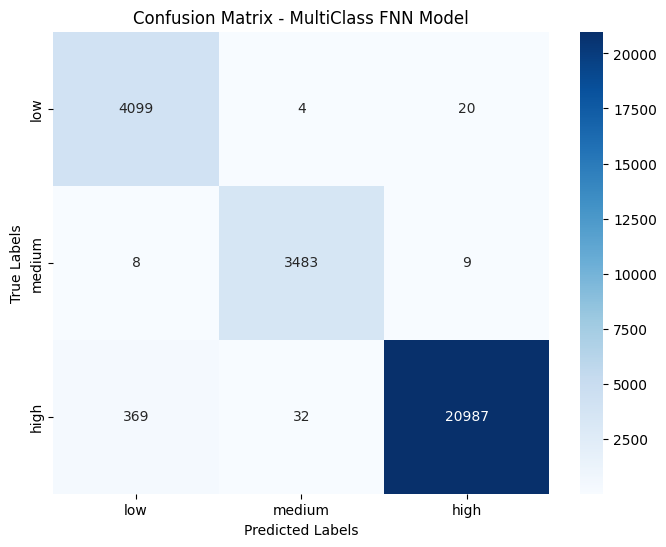

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - MultiClass FNN Model')
plt.show()

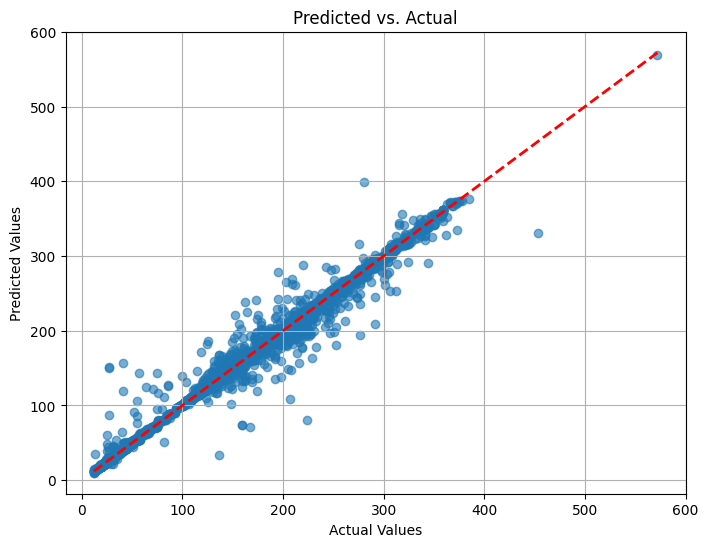

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions from the XGBoost model
predictions = best_model.predict(X_test_scaled)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

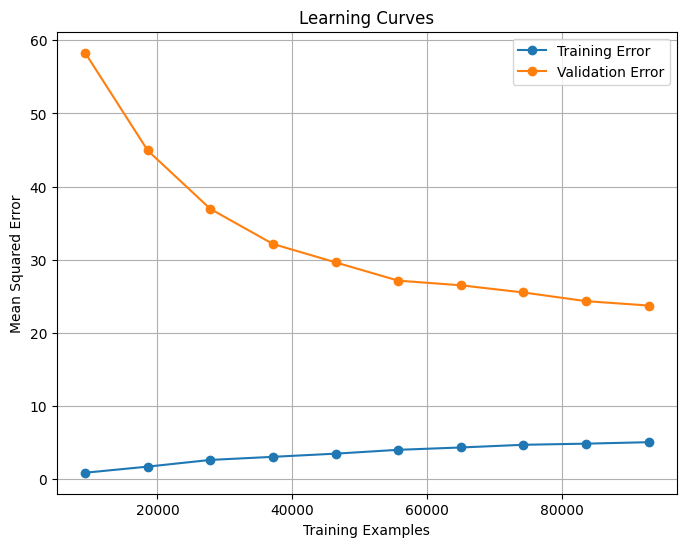

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Learning curve
def plot_learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='o')
    plt.title("Learning Curves")
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Call the function
plot_learning_curve(best_model, X_train_scaled, y_train)

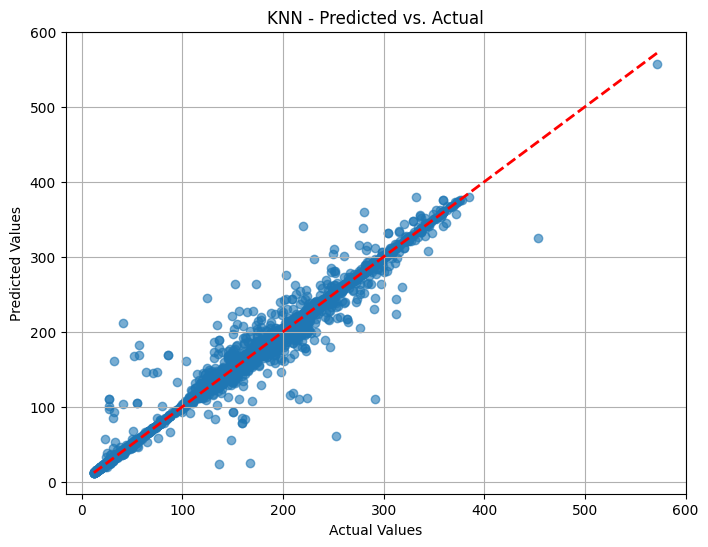

In [ ]:
# Predictions from the KNN model
predictions_knn = knn_regressor.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_knn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("KNN - Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

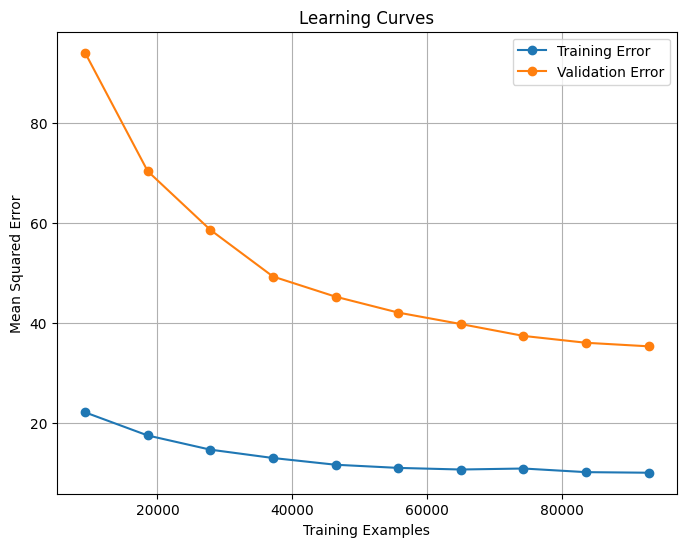

In [ ]:
plot_learning_curve(knn_regressor, X_train, y_train)

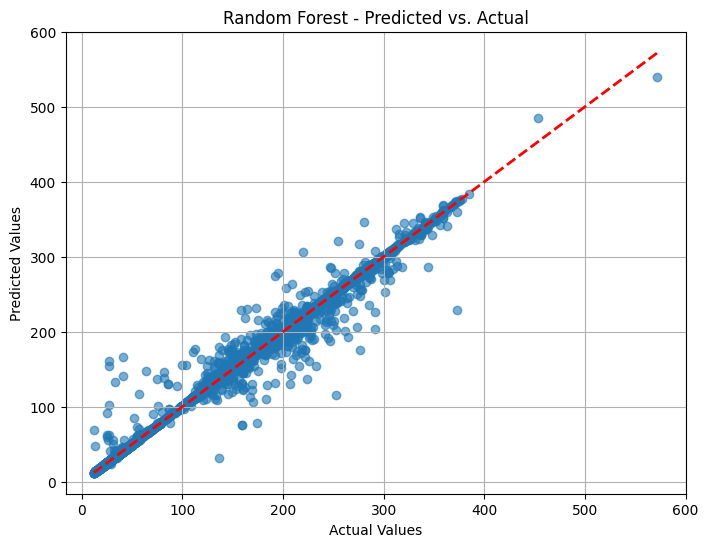

In [ ]:
# Predictions from the Random Forest model
predictions_rf = rfr_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest - Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


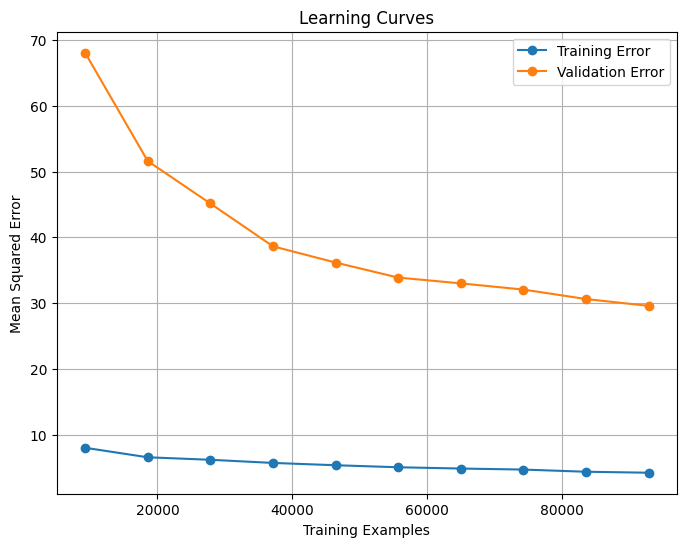

In [ ]:
plot_learning_curve(rfr_model, X_train, y_train)

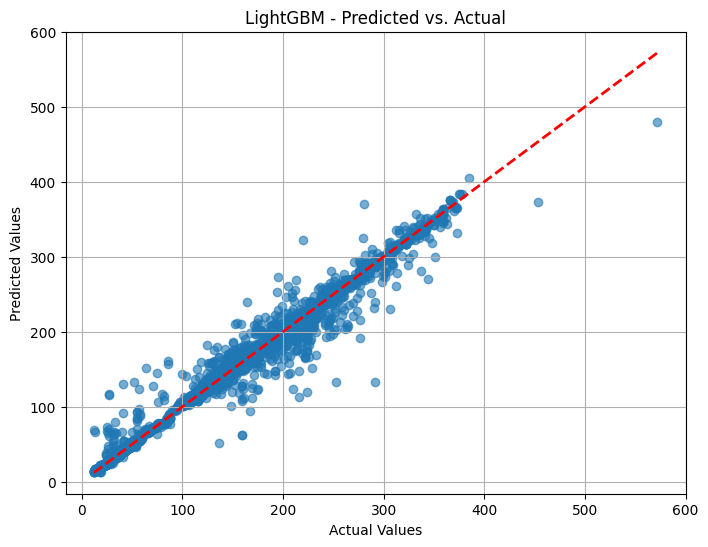

In [ ]:
# Predictions from the LightGBM model
predictions_lgb = lgm_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_lgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("LightGBM - Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

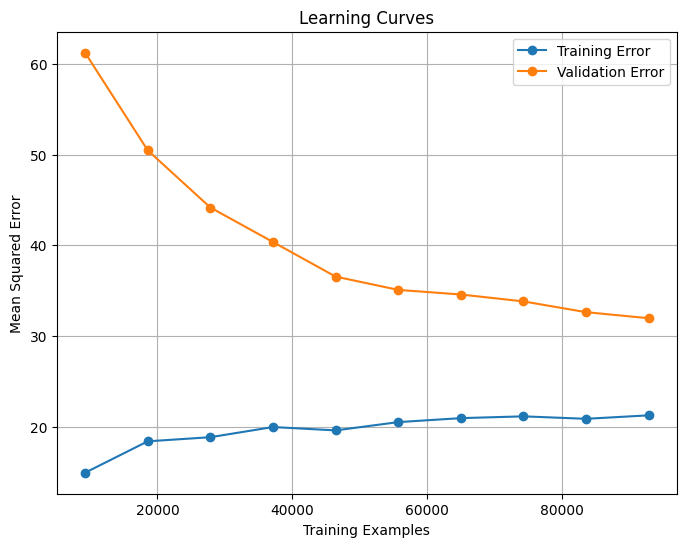

In [ ]:
plot_learning_curve(lgm_model, X_train, y_train)

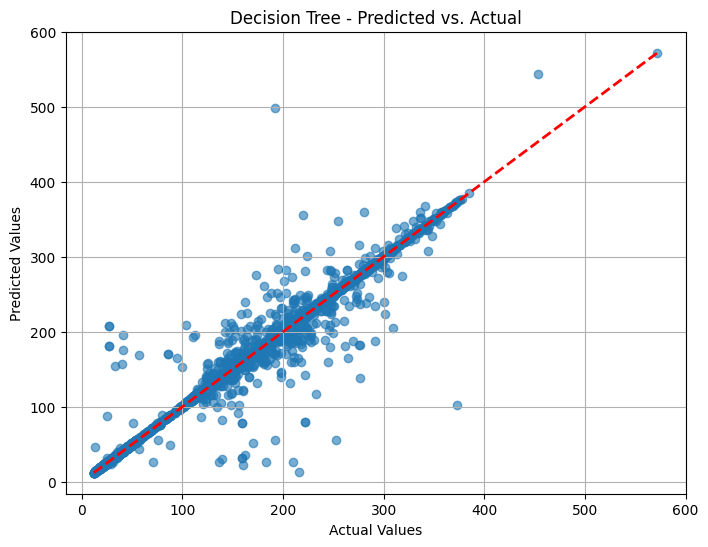

In [ ]:
# Predictions from the Decision Tree model
predictions_dt = dt_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Decision Tree - Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

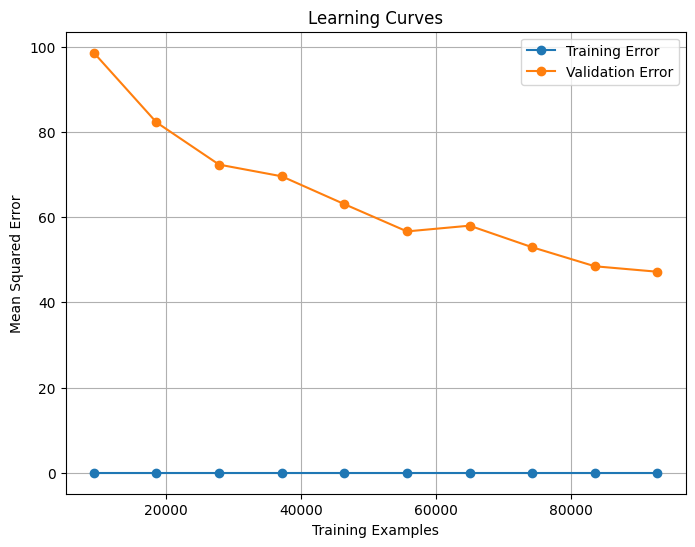

In [ ]:
plot_learning_curve(dt_model, X_train, y_train)

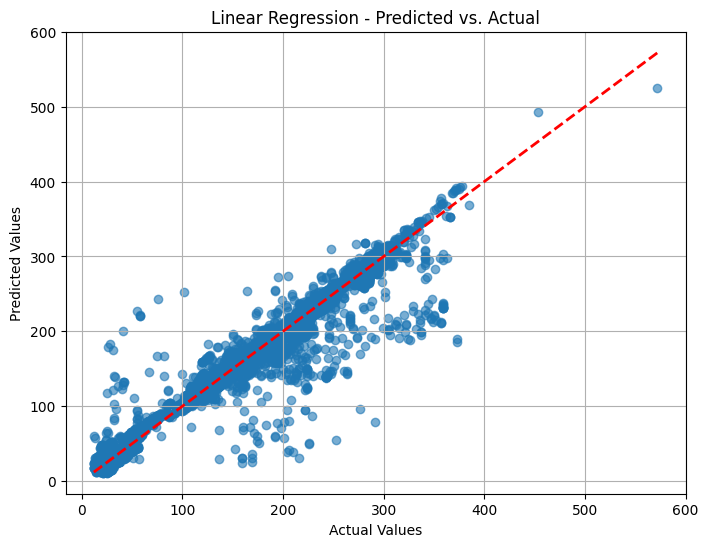

In [ ]:
# Predictions from the Linear Regression model
predictions_lr = lin_reg_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Linear Regression - Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

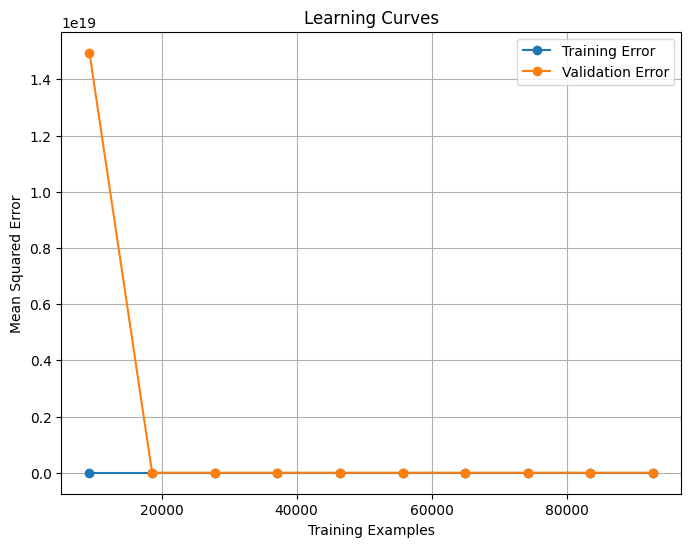

In [ ]:
plot_learning_curve(lin_reg_model, X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, model_name):
    cm = confusion_matrix(y_actual, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

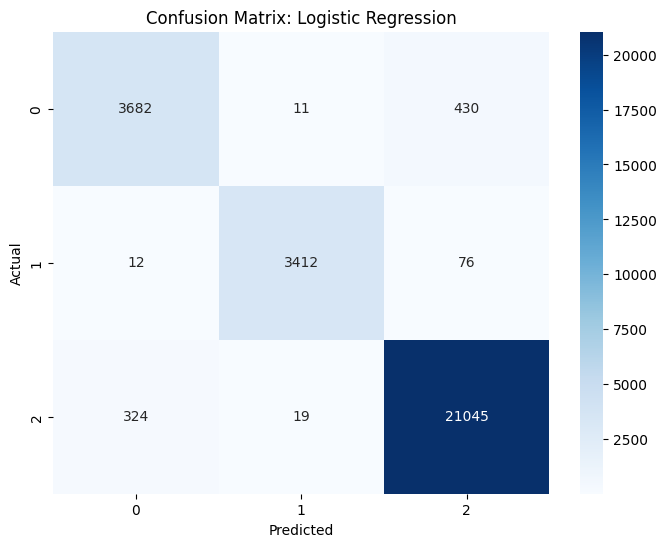

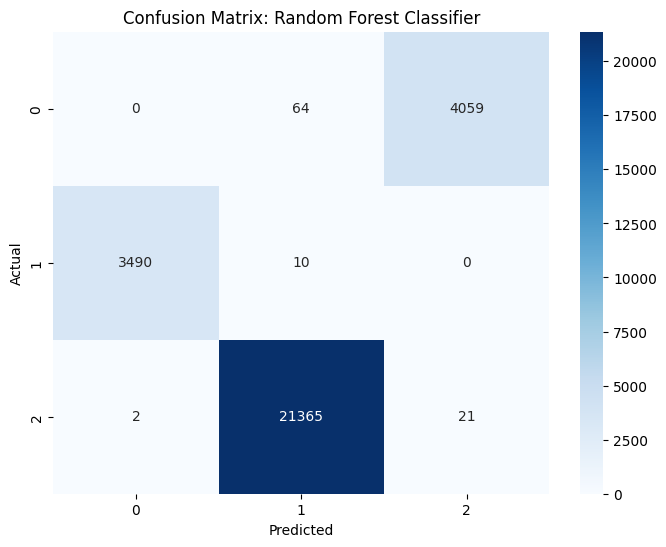

In [ ]:
# Assuming log_reg_predictions are the predictions
plot_confusion_matrix(y_test, log_reg_model.predict(X_test), labels=[0, 1, 2], model_name="Logistic Regression")

# Assuming rf_predictions are the predictions
plot_confusion_matrix(y_test, rf_model.predict(X_test), labels=[0, 1, 2], model_name="Random Forest Classifier")


In [ ]:
import shap

explainer_rfr = shap.Explainer(rfr_model, X_train)  # Create SHAP explainer for Random Forest
shap_values_rfr = explainer_rfr(X_train)  # Calculate SHAP values for the training data

# Plot SHAP summary plot for the Random Forest model
shap.summary_plot(shap_values_rfr, X_train)

NameError: name 'shap' is not defined

In [ ]:
explainer_dt = shap.Explainer(dt_model, X_train)  # Create SHAP explainer for Decision Tree
shap_values_dt = explainer_dt(X_train)  # Calculate SHAP values for the training data

# Plot SHAP summary plot for the Decision Tree model
shap.summary_plot(shap_values_dt, X_train)


In [ ]:
explainer_lgm = shap.Explainer(lgm_model, X_train)  # Create SHAP explainer for LightGBM
shap_values_lgm = explainer_lgm(X_train)  # Calculate SHAP values for the training data

# Plot SHAP summary plot for the LightGBM model
shap.summary_plot(shap_values_lgm, X_train)


In [ ]:
explainer_rf = shap.Explainer(rf_model, X_train)  # Create SHAP explainer for Random Forest Classifier
shap_values_rf = explainer_rf(X_train)  # Calculate SHAP values for the training data

# Plot SHAP summary plot for the Random Forest Classifier
shap.summary_plot(shap_values_rf, X_train)


In [ ]:
# Create SHAP Explainer
explainer_mc = shap.DeepExplainer(modelmc, X_train[:100])

# Calculate SHAP values
shap_values_mc = explainer_mc.shap_values(X_test[:50])  # Outputs SHAP values for each class

# Plot SHAP summary plot for one of the classes
shap.summary_plot(shap_values_mc[0], X_test[:50], feature_names=X_test.columns)  # Class 0
